# Census Income


Project Description


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values are present this is good for our dataset 

In [11]:
# As we have huge data set we should check for duplicate rows in DataFrame

duplicate=df[df.duplicated()]
len(duplicate)

24

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(32536, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [29]:
# We hav3 multiple object columns presetn in dataset. Lets covert them  in to that int

# Handling Objest using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

for i in list:
    df[i]=le.fit_transform(df[i].astype(str))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int32
 2   Fnlwgt          32536 non-null  int64
 3   Education       32536 non-null  int32
 4   Education_num   32536 non-null  int64
 5   Marital_status  32536 non-null  int32
 6   Occupation      32536 non-null  int32
 7   Relationship    32536 non-null  int32
 8   Race            32536 non-null  int32
 9   Sex             32536 non-null  int32
 10  Capital_gain    32536 non-null  int64
 11  Capital_loss    32536 non-null  int64
 12  Hours_per_week  32536 non-null  int64
 13  Native_country  32536 non-null  int32
 14  Income          32536 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.9 MB


In [16]:
# Checking for blank space in data
df.loc[df['Age']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


No space present in dataset

<AxesSubplot:>

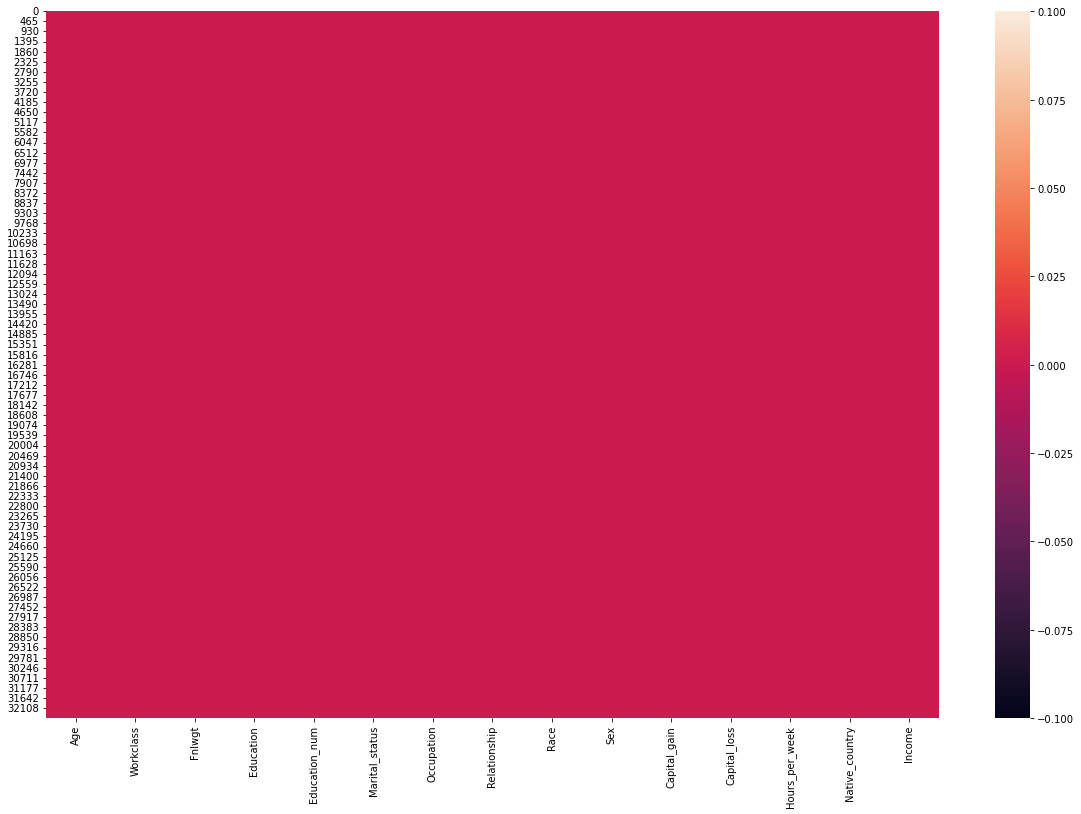

In [25]:
plt.figure(figsize=(20,13))
sns.heatmap(df.isnull())

In [26]:
#  original dataset just to visualize catagorical data

df2 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

<AxesSubplot:xlabel='Workclass', ylabel='count'>

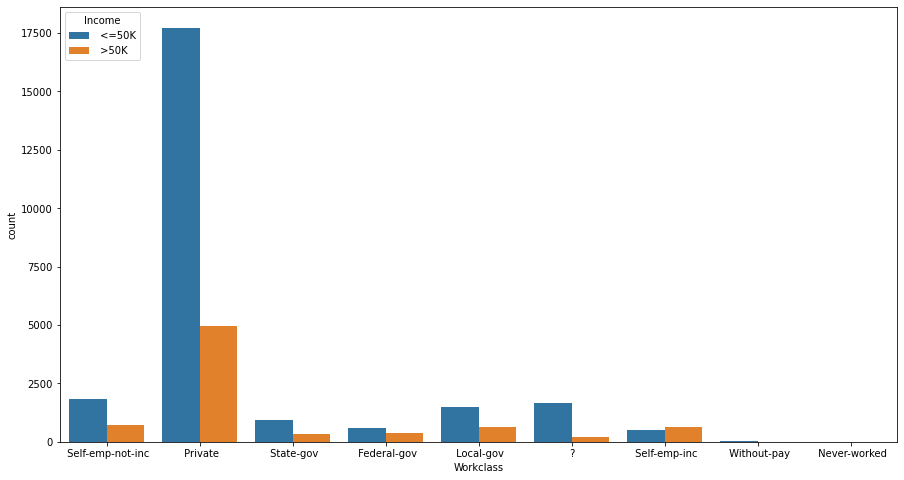

In [33]:
ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Workclass',data=df2,hue='Income')

<AxesSubplot:xlabel='Income', ylabel='count'>

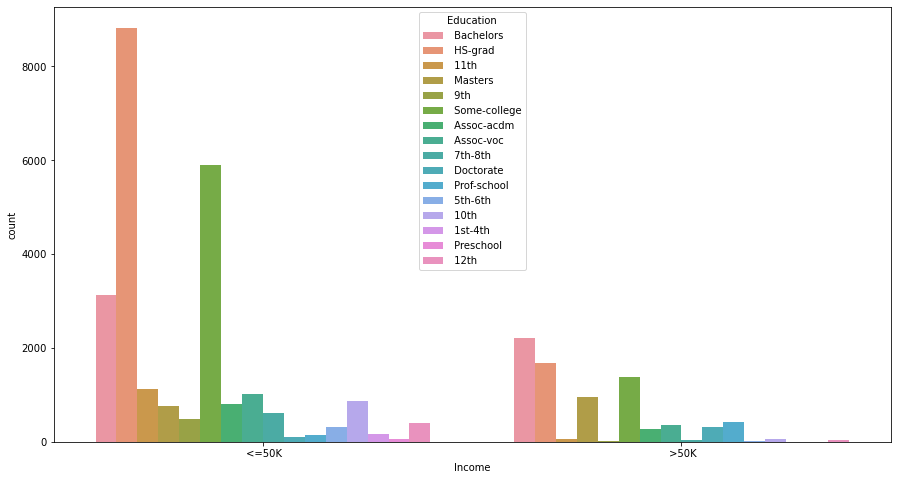

In [35]:
ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Income',data=df2,hue="Education")

Those whose education is HS-grad they are having high count and most of them are earning leas than or equal to 50K Most of members are educated more that 12th as we can see count is less for 12 th those who did some college has good earnings than other

<AxesSubplot:xlabel='Income', ylabel='count'>

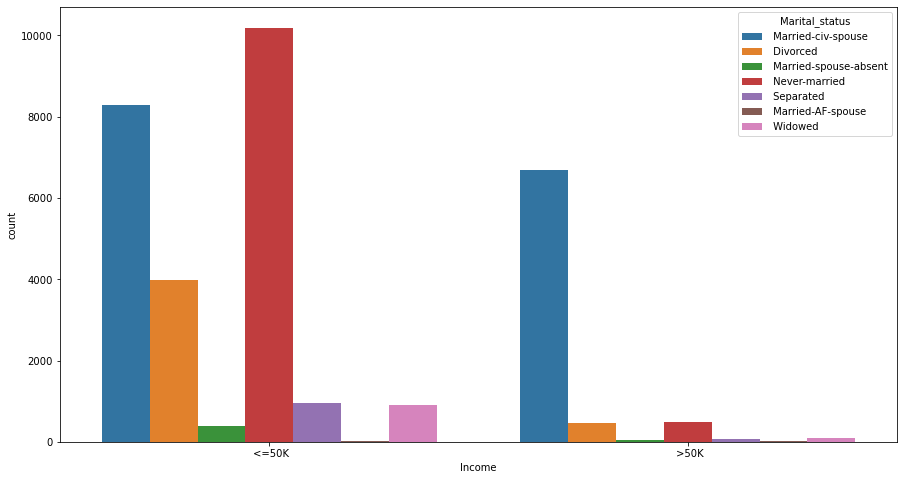

In [37]:
ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Income',data=df2,hue='Marital_status')

<AxesSubplot:xlabel='Income', ylabel='count'>

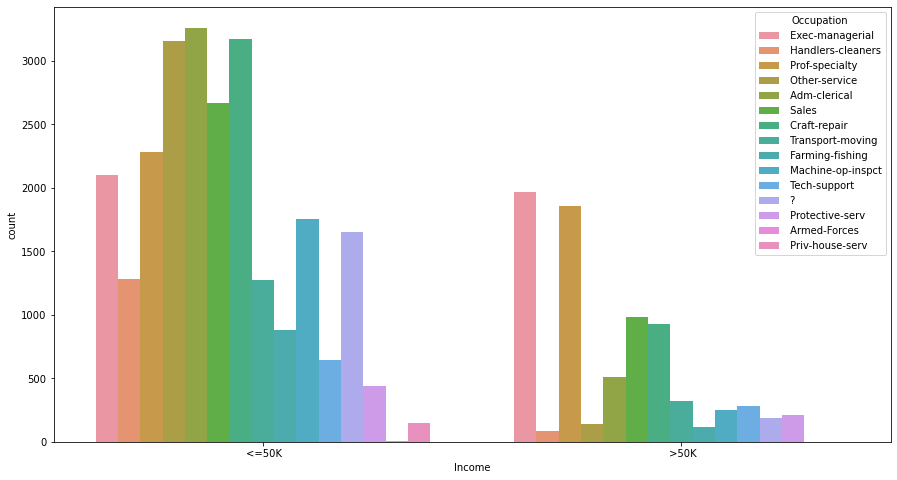

In [38]:
 ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Income',data=df2,hue='Occupation')

<AxesSubplot:xlabel='Income', ylabel='count'>

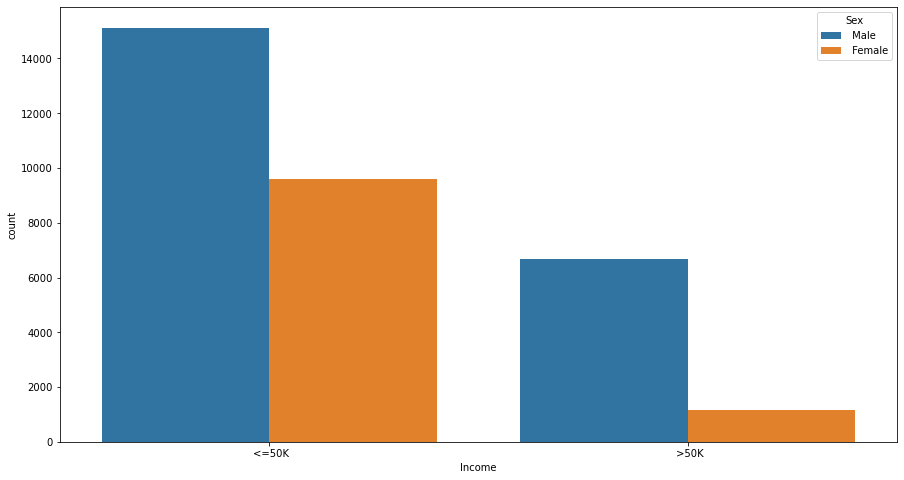

In [39]:
ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Income',data=df2,hue='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

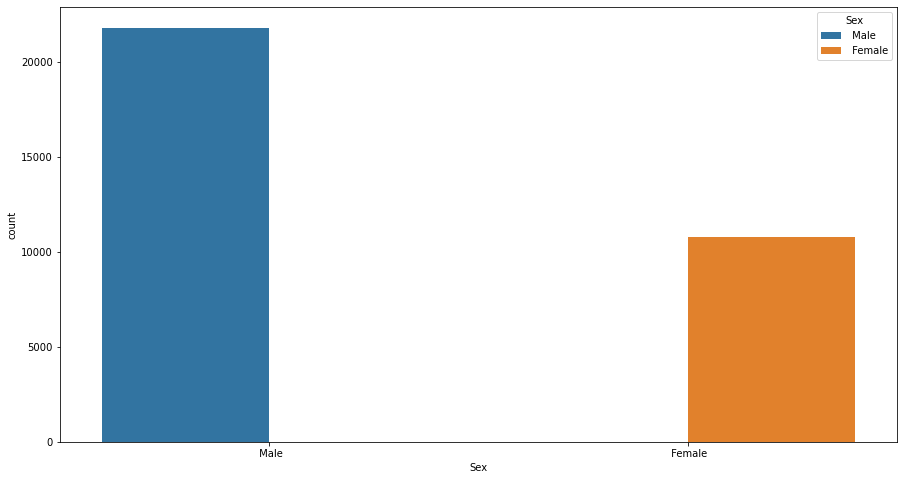

In [41]:
ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Sex',data=df2,hue='Sex')

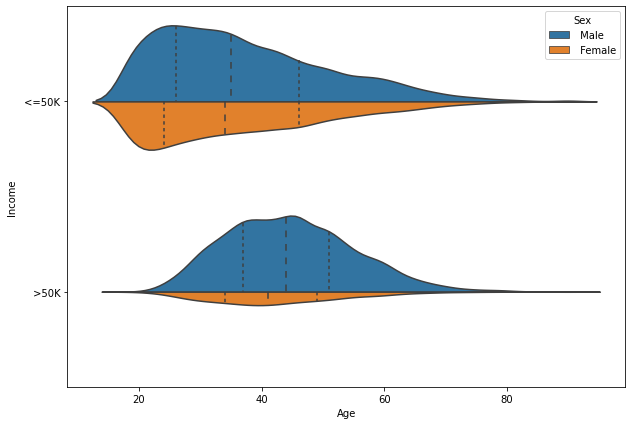

In [43]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Age", y="Income", hue="Sex", data=df2,split=True, scale="count", inner="quartile")
plt.show()

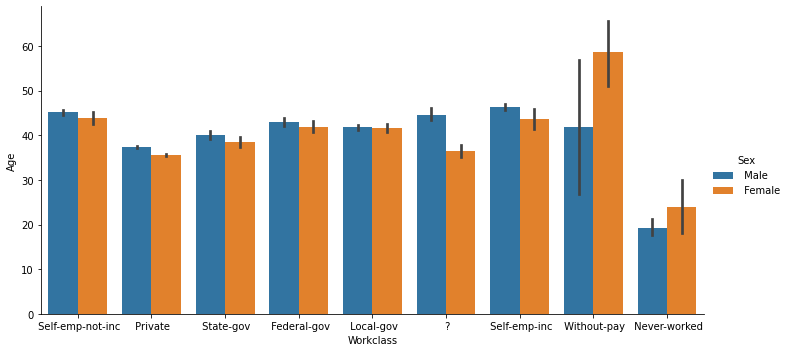

In [45]:
sns.catplot(data=df2, x="Workclass", y="Age", kind="bar",hue="Sex",height=5, aspect=2)

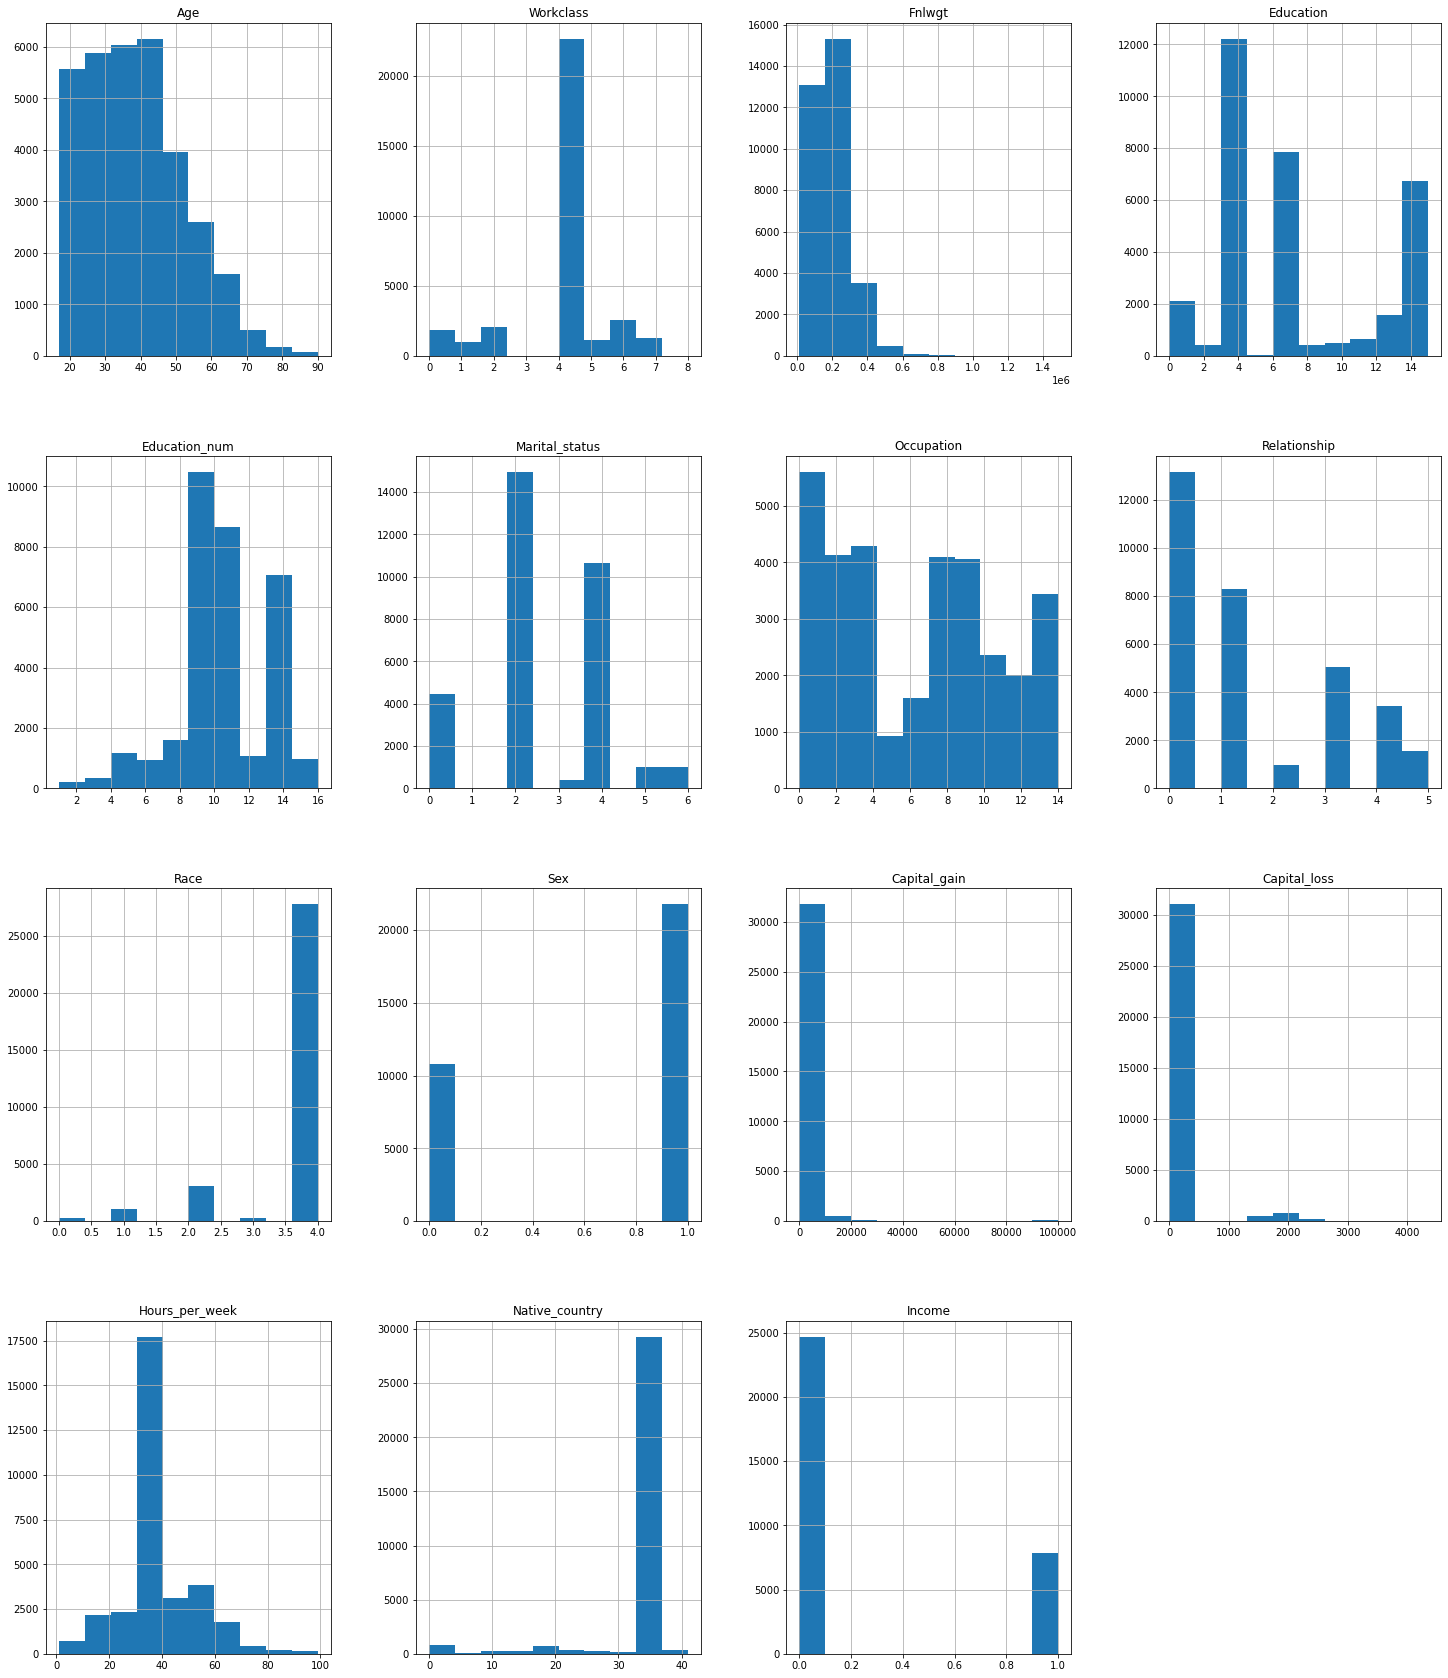

In [46]:
df.hist(figsize=(25,30))
plt.show()

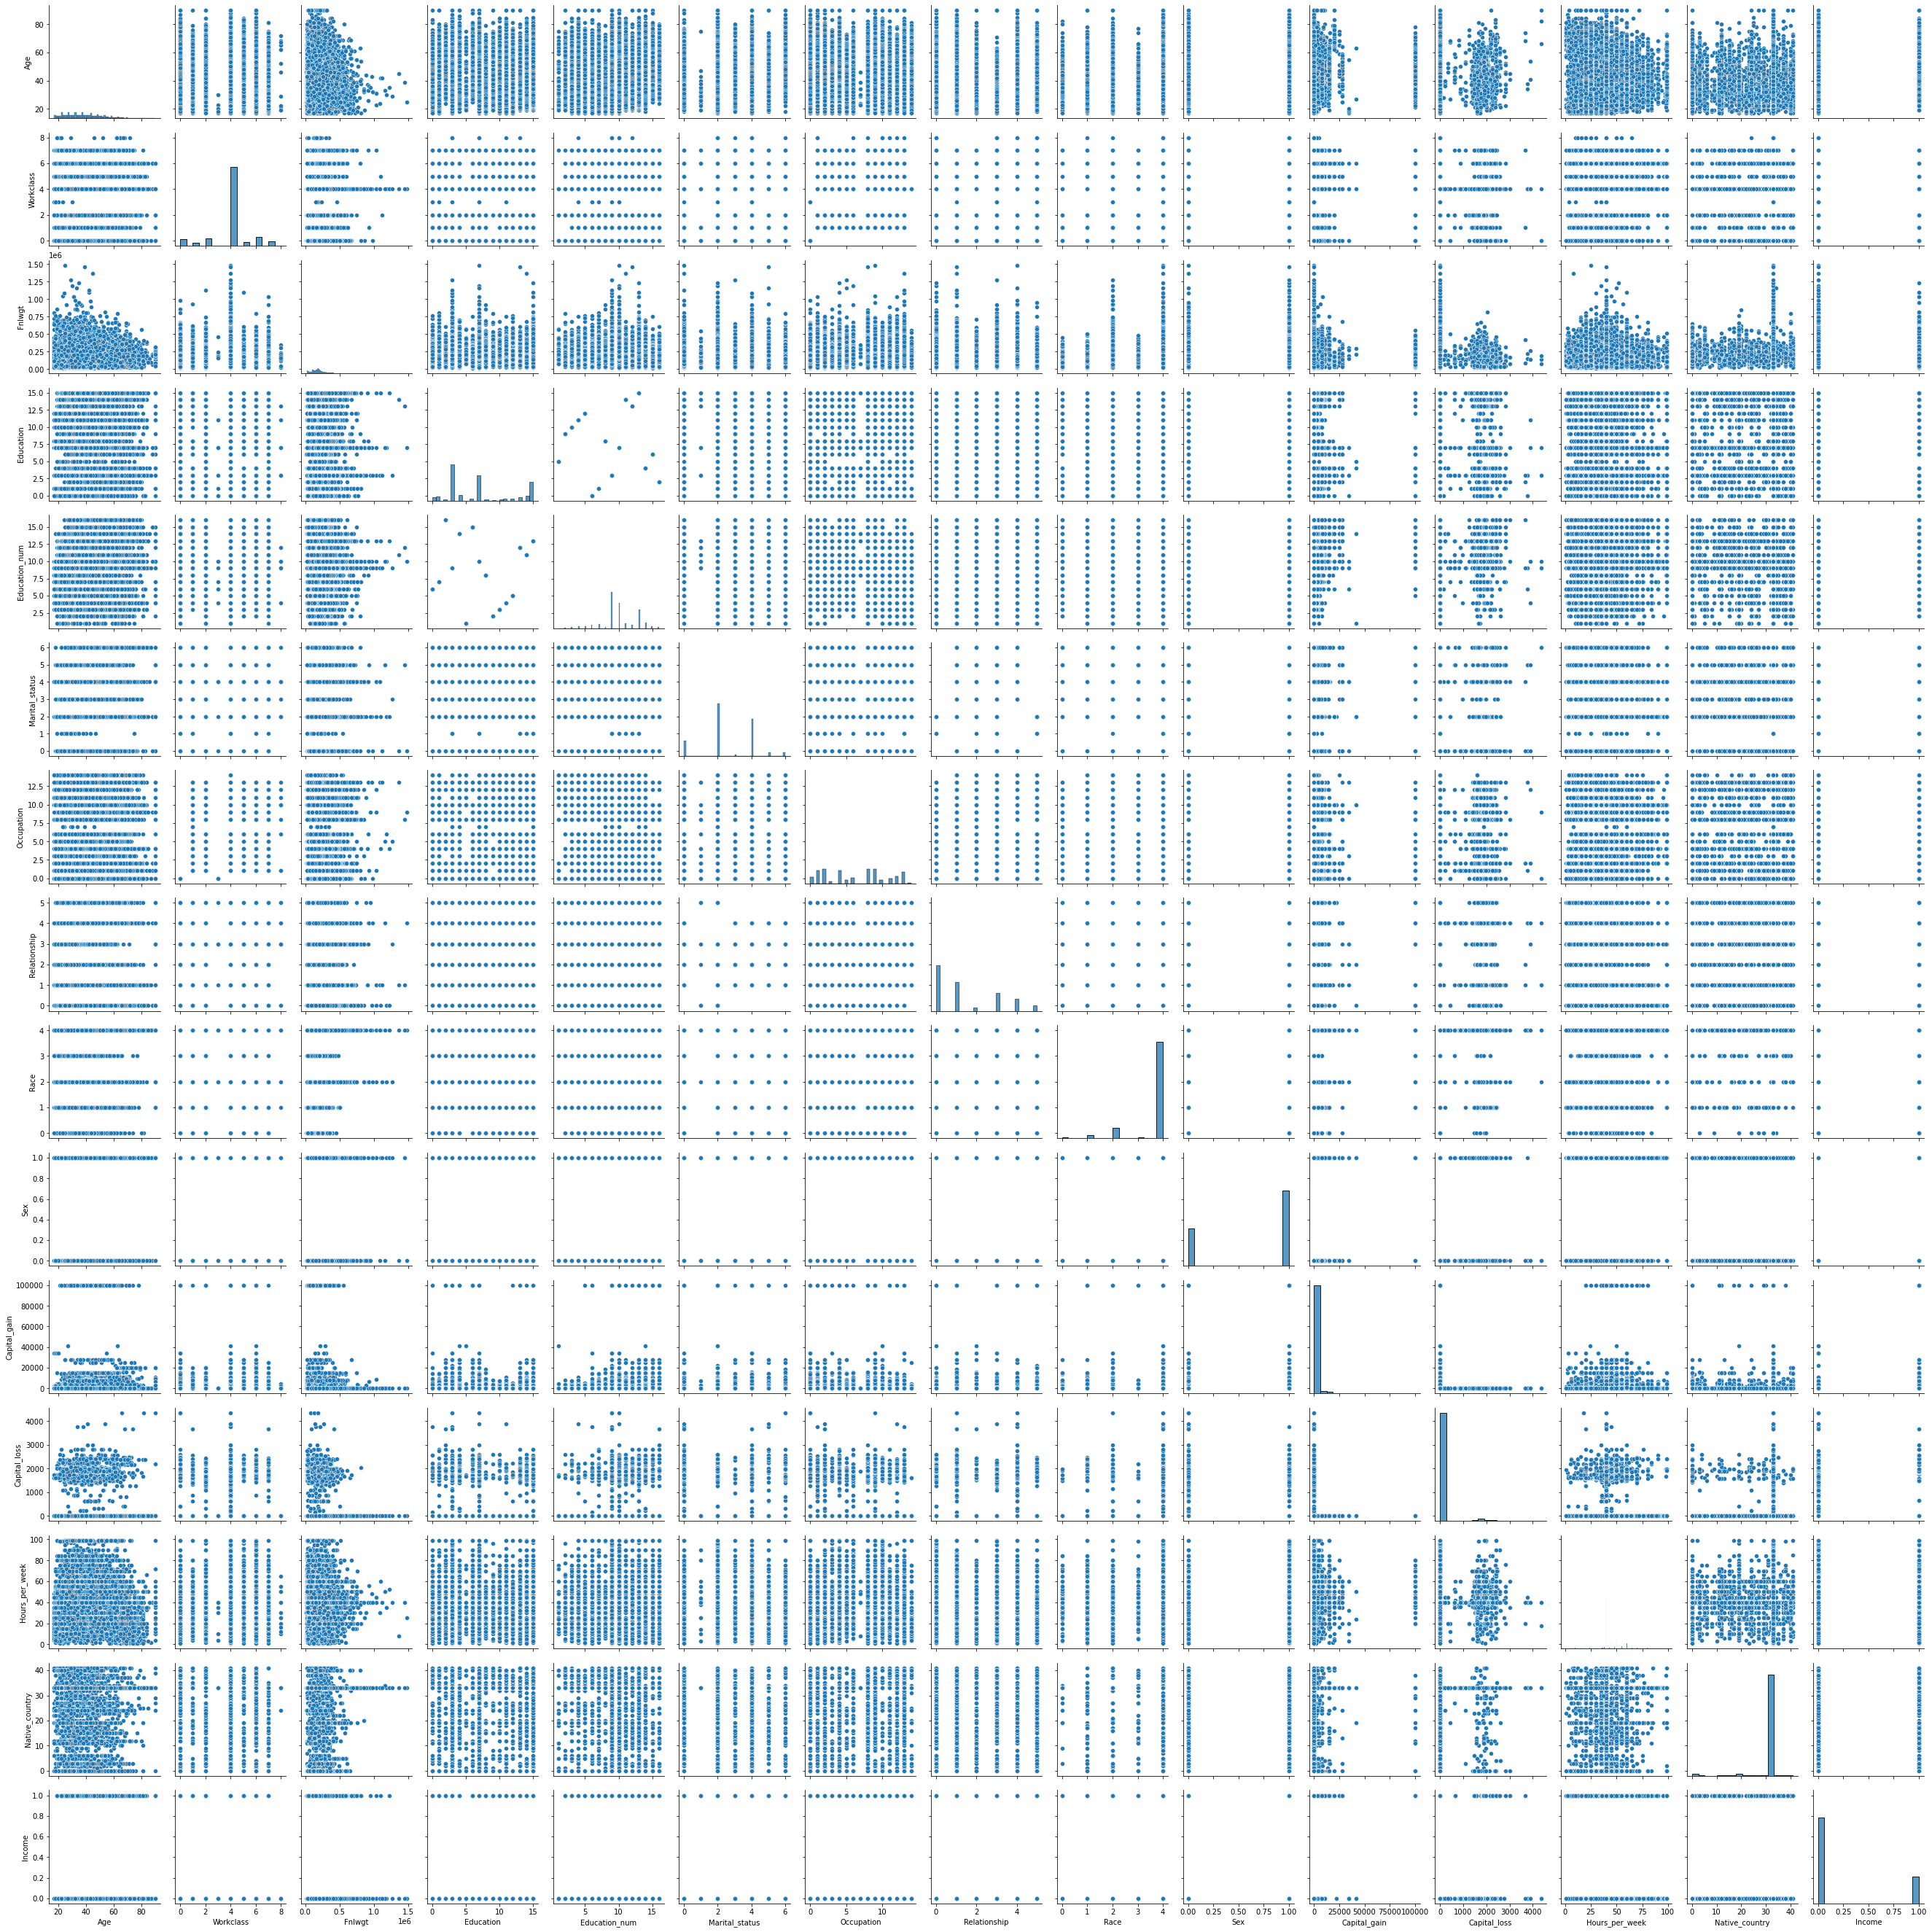

In [47]:
sns.pairplot(df)

In [48]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.076448,0.011896,0.036224,-0.266142,-0.049569,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,0.010499,0.234039
Workclass,0.003781,1.000000,-0.016532,0.004779,0.052099,-0.064828,0.277736,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.009506,0.051706
Fnlwgt,-0.076448,-0.016532,1.000000,-0.003170,-0.043353,0.028154,0.002435,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.046390,-0.009521
Education,0.011896,0.004779,-0.003170,1.000000,0.411289,-0.015609,-0.128136,-0.056115,0.013295,0.004475,0.024102,0.020242,0.061529,-0.039805,0.139785
Education_num,0.036224,0.052099,-0.043353,0.411289,1.000000,-0.069196,-0.283062,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.035274,0.335299
Marital_status,-0.266142,-0.064828,0.028154,-0.015609,-0.069196,1.000000,0.007942,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020817,-0.199187
Occupation,-0.049569,0.277736,0.002435,-0.128136,-0.283062,0.007942,1.000000,-0.045267,-0.017959,0.129584,-0.037840,-0.024034,0.030500,-0.032761,-0.092552
Relationship,-0.263744,-0.090421,0.008859,-0.056115,-0.094424,0.185542,-0.045267,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,0.001967,-0.250955
Race,0.029116,0.049717,-0.021484,0.013295,0.031998,-0.067942,-0.017959,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.152264,0.071855
Sex,0.088708,0.095960,0.027113,0.004475,0.012181,-0.129425,0.129584,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.018451,0.215984


<AxesSubplot:>

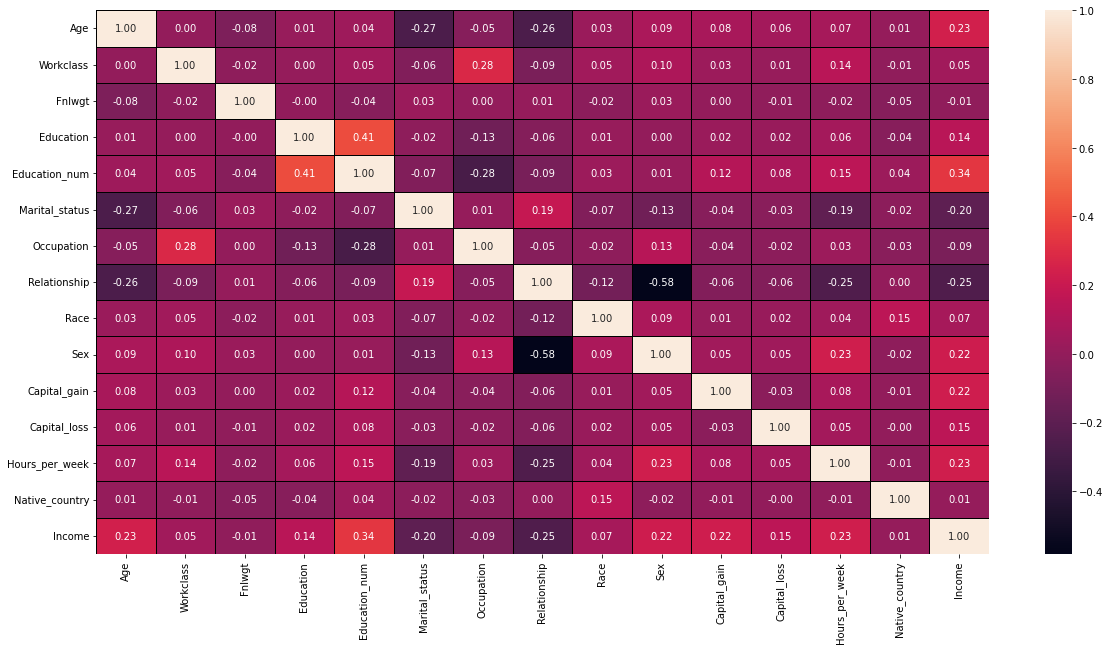

In [50]:
# Plotting all correlation values on heatma[]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.6,linecolor="black", fmt='.2f')

In [51]:
df.corr()['Income'].sort_values()

Relationship     -0.250955
Marital_status   -0.199187
Occupation       -0.092552
Fnlwgt           -0.009521
Native_country    0.008218
Workclass         0.051706
Race              0.071855
Education         0.139785
Capital_loss      0.150498
Sex               0.215984
Capital_gain      0.223340
Hours_per_week    0.229659
Age               0.234039
Education_num     0.335299
Income            1.000000
Name: Income, dtype: float64

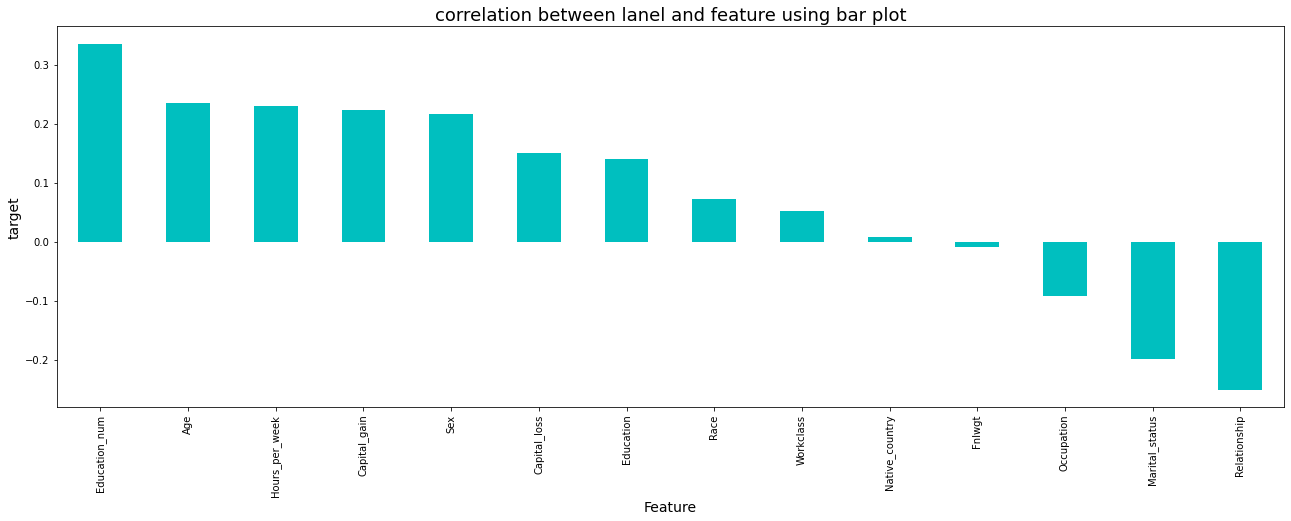

In [52]:
# Ploting correaltion with target 

plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [53]:
# We can see that Native_country and Fnlwge are having very less correlation so I will drop both

df.drop('Fnlwgt',axis=1,inplace=True)
df.drop('Native_country',axis=1,inplace=True)

In [54]:
df.shape

(32536, 13)

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.0,90.0
Workclass,32536.0,3.868638,1.456363,0.0,4.0,4.0,4.0,8.0
Education,32536.0,7.071890,4.827642,0.0,3.0,7.0,12.0,15.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.0,16.0
Marital_status,32536.0,2.611384,1.506304,0.0,2.0,2.0,4.0,6.0
Occupation,32536.0,6.332155,4.259204,0.0,2.0,6.0,9.0,14.0
Relationship,32536.0,1.446552,1.607087,0.0,0.0,1.0,3.0,5.0
Race,32536.0,3.665816,0.848858,0.0,4.0,4.0,4.0,4.0
Sex,32536.0,0.669228,0.470498,0.0,0.0,1.0,1.0,1.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.0,99999.0


In above table count shows us numnber of row Mean shows us mean for each column 25% percentile is data covered withing 25 percentile 75% data covered upto 75% percentile Max column is showing maximum value in that perticuler column

# Outliers review

<function matplotlib.pyplot.show(close=None, block=None)>

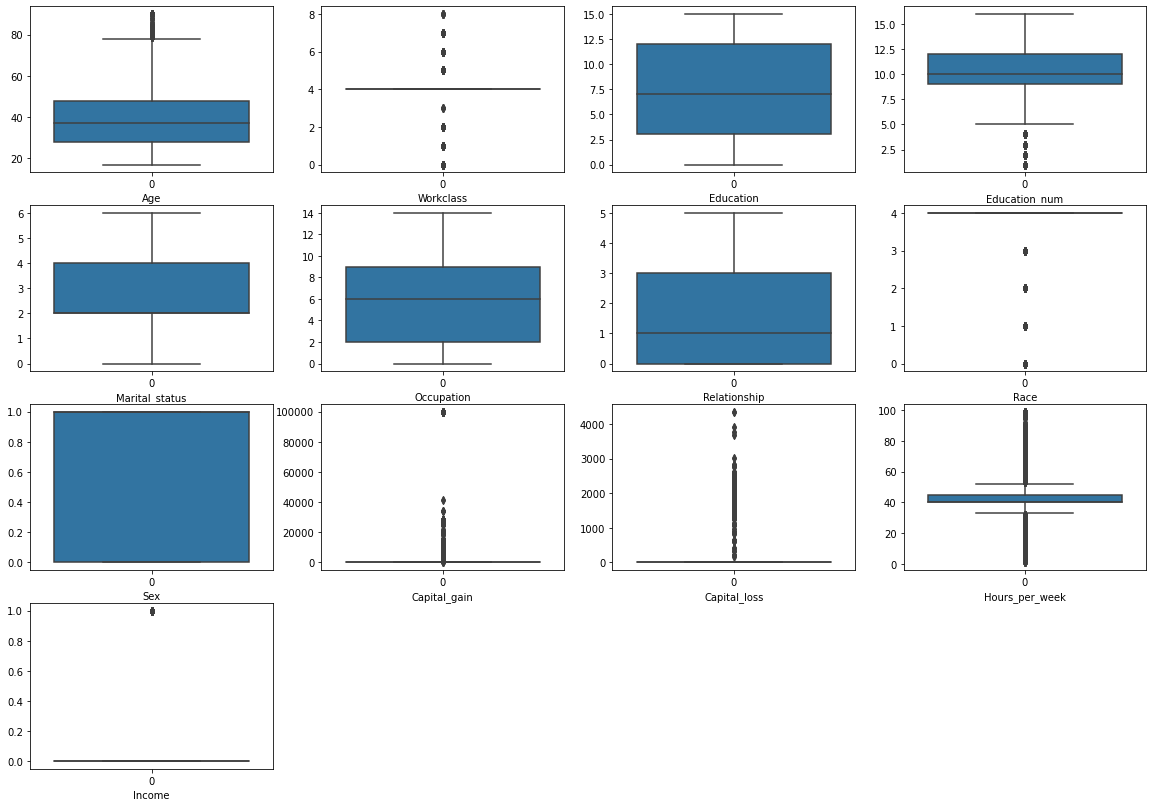

In [59]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=13:
        plt.subplot(7,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

In [60]:
#We have outliers presetn in dataset lets treat them

from scipy.stats import zscore
zscore=zscore(df)
zabs=np.abs(zscore)

z=df[(zabs<3).all(axis=1)]

In [61]:
z.shape

(28893, 13)

In [62]:
df.shape

(32536, 13)

In [63]:
loss=(32536-28893)/32536*100
loss

11.196828128841899

In [64]:
dropindex=df.index.difference(z.index)
dropindex

Int64Index([    9,    10,    13,    14,    22,    26,    27,    31,    51,
               76,
            ...
            32468, 32475, 32485, 32493, 32517, 32524, 32530, 32532, 32550,
            32552],
           dtype='int64', length=3643)

In [65]:
df.drop(dropindex,inplace=True)
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,15,13,2,9,0,4,1,0,0,13,0
1,38,4,3,9,0,11,1,4,1,0,0,40,0
2,53,4,1,7,2,11,0,2,1,0,0,40,0
3,28,4,15,13,2,2,5,2,0,0,0,40,0
4,37,4,4,14,2,9,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,13,12,2,5,5,4,0,0,0,38,0
32556,40,4,3,9,2,12,0,4,1,0,0,40,1
32557,58,4,3,9,6,1,4,4,0,0,0,40,0
32558,22,4,3,9,4,1,3,4,1,0,0,20,0


<function matplotlib.pyplot.show(close=None, block=None)>

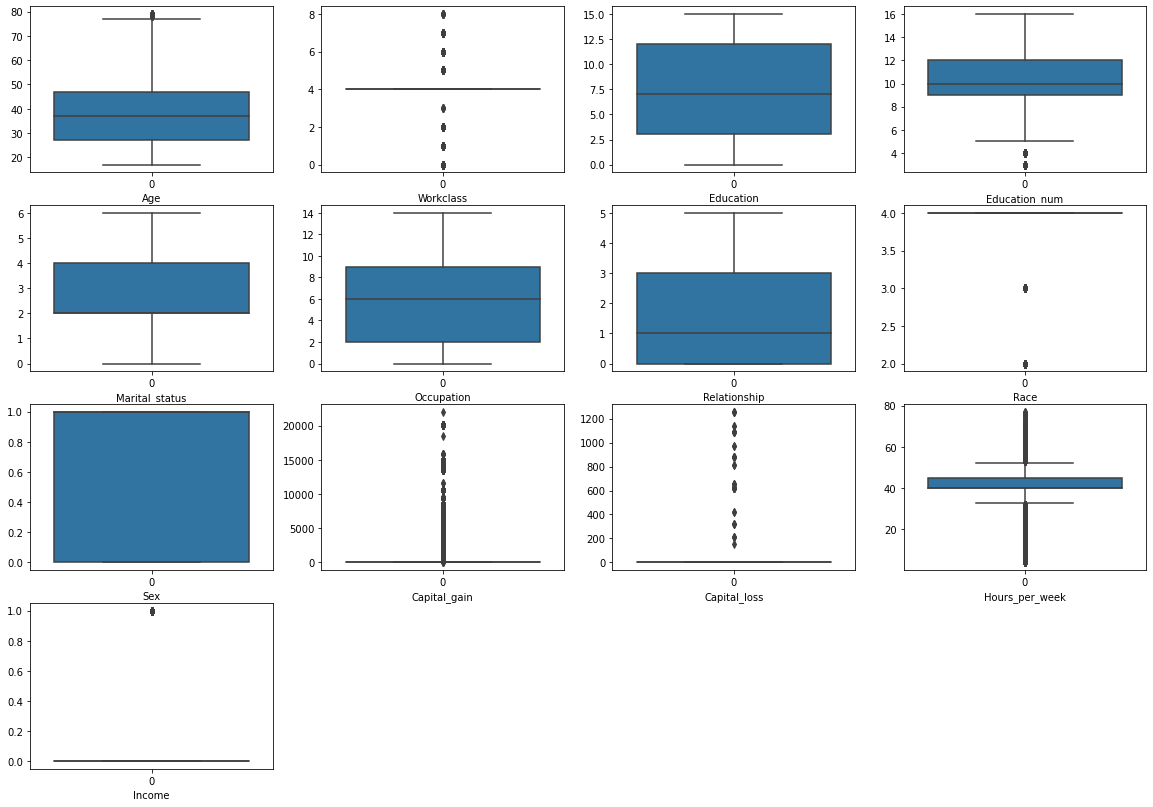

In [66]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=28:
        plt.subplot(7,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

# Skewness of data

In [68]:
df.skew()

Age                0.488115
Workclass         -0.749758
Education          0.574451
Education_num     -0.166294
Marital_status    -0.047123
Occupation         0.089568
Relationship       0.749435
Race              -2.545355
Sex               -0.684303
Capital_gain       4.938534
Capital_loss      29.667860
Hours_per_week    -0.357914
Income             1.326455
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

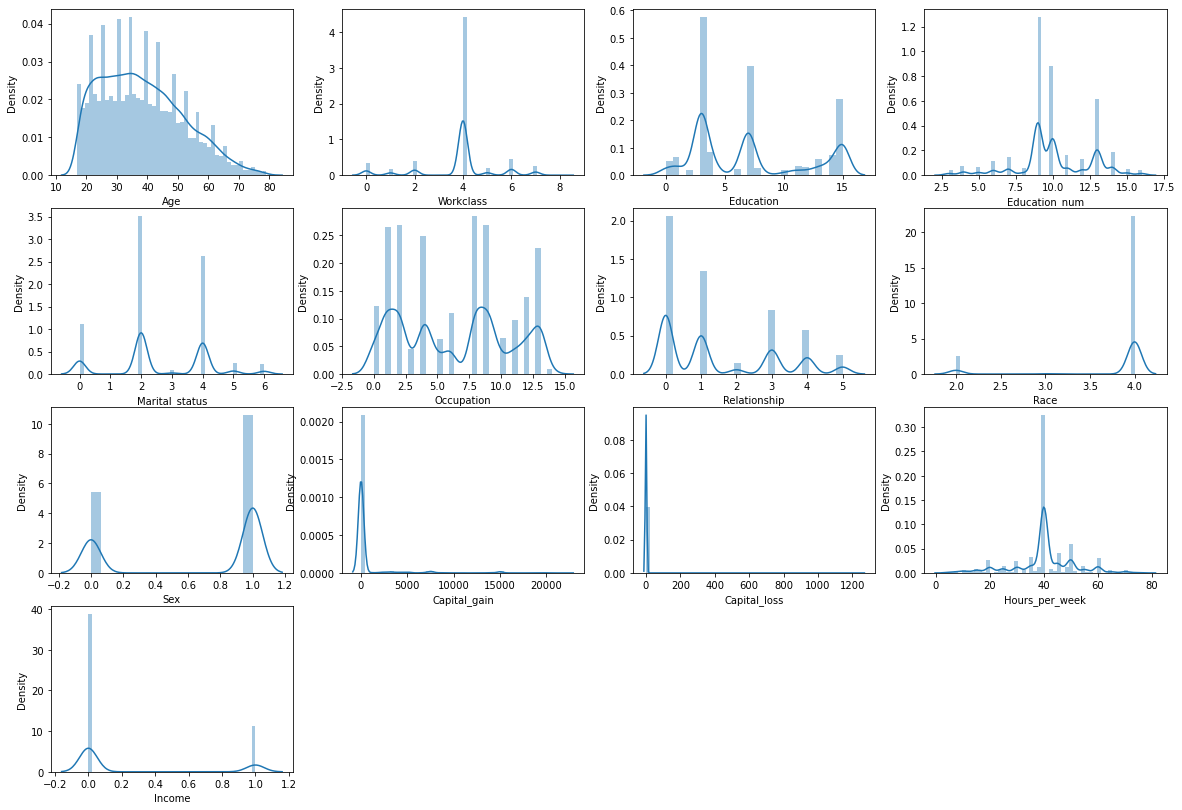

In [69]:
# Ploting on graph to better visualization

plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=28:
        plt.subplot(7,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

We have very high skewed data preset as we can look at the capital gain,capital loss and race

# Defining x and y

In [71]:
x = df.drop("Income", axis=1)
y = df["Income"]

In [73]:
x.shape

(28893, 12)

In [75]:
y.shape

(28893,)

# Removing Skewness using yeo-johnson method

In [76]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.9254675 ,  1.66394781,  1.4406438 , ..., -0.29713562,
        -0.03993269, -2.21771728],
       [ 0.12898472,  0.01766221, -0.78740324, ..., -0.29713562,
        -0.03993269, -0.03881892],
       [ 1.1001567 ,  0.01766221, -1.62645976, ..., -0.29713562,
        -0.03993269, -0.03881892],
       ...,
       [ 1.37433981,  0.01766221, -0.78740324, ..., -0.29713562,
        -0.03993269, -0.03881892],
       [-1.3317168 ,  0.01766221, -0.78740324, ..., -0.29713562,
        -0.03993269, -1.72341471],
       [ 1.04283305,  0.80690513, -0.78740324, ...,  3.36550369,
        -0.03993269, -0.03881892]])

In [77]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Income'],
      dtype='object')

In [78]:
Columnsname=['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week']

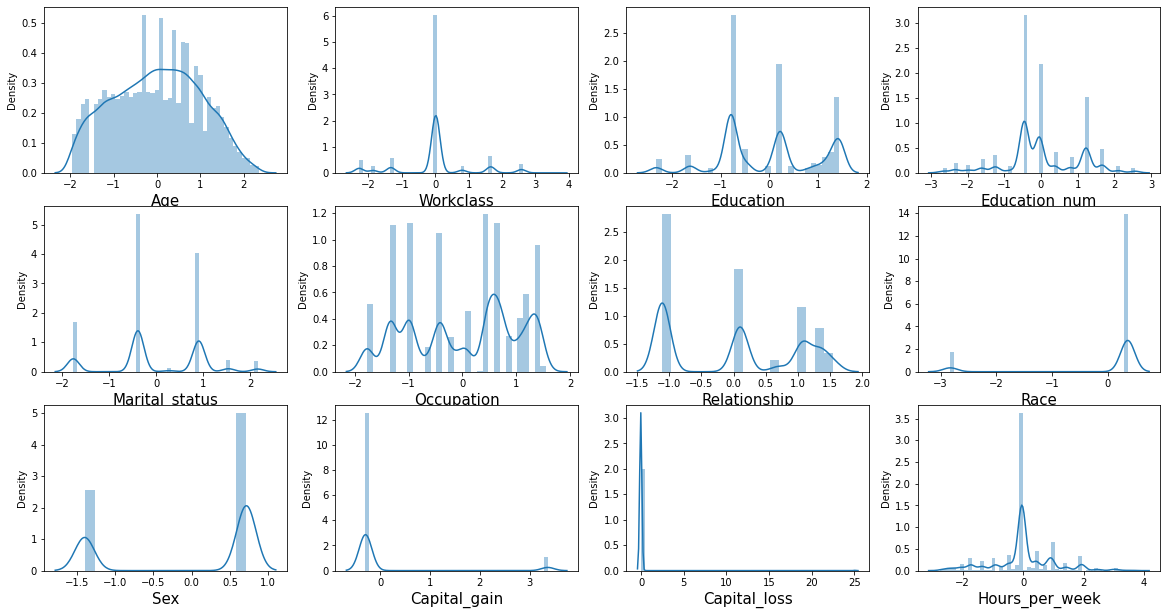

In [79]:
new_x=pd.DataFrame(data=x,columns=Columnsname)

plt.figure(figsize=(20,25),facecolor='white')

plotn=1

for col in new_x:
    if plotn<=12:
        plt.subplot(7,4,plotn)
        sns.distplot(new_x[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show() 

# Checking balancing of target variabel

In [80]:
y.value_counts()

0    22431
1     6462
Name: Income, dtype: int64

In [81]:
# I will use SMOT to balance class

In [82]:
# WIll raise count of "1"


from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

ModuleNotFoundError: No module named 'imblearn'

In [83]:
y.value_counts()

0    22431
1     6462
Name: Income, dtype: int64

# Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=Columnsname)
x.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.925467,1.663948,1.440644,1.225471,-0.387438,0.678838,-1.110357,0.353529,0.714775,-0.297136,-0.039933,-2.217717
1,0.128985,0.017662,-0.787403,-0.455300,-1.762305,1.048907,0.100517,0.353529,0.714775,-0.297136,-0.039933,-0.038819
2,1.100157,0.017662,-1.626460,-1.243080,-0.387438,1.048907,-1.110357,-2.832662,0.714775,-0.297136,-0.039933,-0.038819
3,-0.707440,0.017662,1.440644,1.225471,-0.387438,-0.992589,1.548796,-2.832662,-1.399042,-0.297136,-0.039933,-0.038819
4,0.053869,0.017662,-0.482329,1.664391,-0.387438,0.678838,1.548796,0.353529,-1.399042,-0.297136,-0.039933,-0.038819


# Lets train models now

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [87]:
# Finding best Random state

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8555113341408548 on Random State: 85


In [89]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
EXT=ExtraTreesClassifier()
GB=GradientBoostingClassifier()

model=[LOGR,RFC,DTC,SV,KNN,EXT,GB]


for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[4168  294]
 [ 727  590]]
Classification report :               precision    recall  f1-score   support

           0       0.85      0.93      0.89      4462
           1       0.67      0.45      0.54      1317

    accuracy                           0.82      5779
   macro avg       0.76      0.69      0.71      5779
weighted avg       0.81      0.82      0.81      5779

Accuracy score : 0.8233258349195363
*****************************************************************
performance matrix of RandomForestClassifier() is:
Confusion matrix : [[4127  335]
 [ 548  769]]
Classification report :               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4462
           1       0.70      0.58      0.64      1317

    accuracy                           0.85      5779
   macro avg       0.79      0.75      0.77      5779
weighted avg       0.84      0.85      0.84

# Cross validation

In [90]:
from sklearn.model_selection import cross_val_score
j=[LOGR,RFC,DTC,SV,KNN,EXT,GB]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=5)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LogisticRegression(solver='liblinear') is
[0.82644056 0.83197785 0.83197785 0.82883351 0.82744894]
0.8293357426008194
0.0022871729075698145


Cross_Validation_score of RandomForestClassifier() is
[0.84253331 0.84287939 0.84339851 0.84890966 0.85046729]
0.845637632010626
0.0033552975979620676


Cross_Validation_score of DecisionTreeClassifier() is
[0.80740613 0.81000173 0.81173213 0.81169955 0.81758394]
0.8116846957428308
0.0033449088929066897


Cross_Validation_score of SVC() is
[0.83370825 0.84322547 0.84305243 0.84371755 0.83783316]
0.8403073732725241
0.003933193261880813


Cross_Validation_score of KNeighborsClassifier() is
[0.82644056 0.82540232 0.82903617 0.82952579 0.83125649]
0.8283322644844301
0.002127636941147531


Cross_Validation_score of ExtraTreesClassifier() is
[0.83595778 0.83197785 0.83405433 0.83627553 0.84077535]
0.8358081692639786
0.0029209934620580344


Cross_Validation_score of GradientBoostingClassifier() is
[0.85914518 0.86329815 0.86416

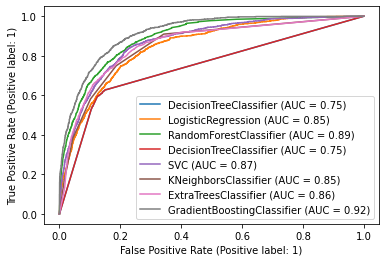

In [91]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,DTC,SV,KNN,EXT,GB]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

# Hypert parameter tunning for best model

In [92]:
# Choosing Extra Trees Classifier

Parameters = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [20, 780, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]}

In [93]:
from sklearn.model_selection import GridSearchCV

GSCV = GridSearchCV(ExtraTreesClassifier(), Parameters, cv=5)

In [94]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [20, 780, 1000]})

In [95]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [96]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=30, n_estimators=300, n_jobs=-2, random_state=20)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 83.8899463575013


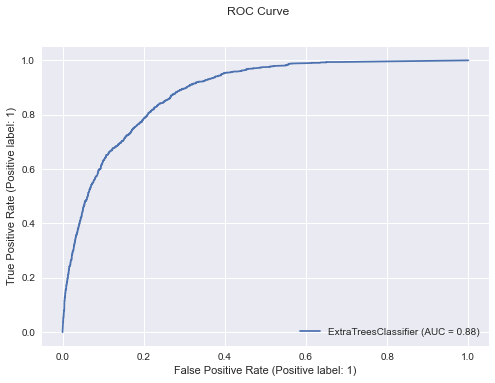

In [97]:
from sklearn import metrics
plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

we have seen AOC is 88% 

# Confusion Matrix

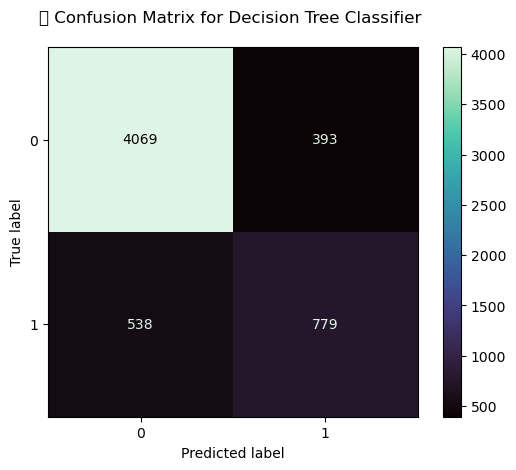

In [98]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

# Saving the model

In [99]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_Model ,"Census_Income_predict.pkl")

['Census_Income_predict.pkl']

In [100]:
# Loading the saved model
model=joblib.load("Census_Income_predict.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 1, ..., 0, 0, 0])

In [101]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
5774,0,1
5775,0,0
5776,0,0
5777,0,0


...............................................................................